## TP6

### Apprentissage par perceptron multi-couches sous sklearn



```
# Ce texte est au format code
```

#### Elhiani Youssef

#### ATTRASSI Alaeddine

### 1.2.1 Prise en main du modele :

- 1. Soit le jeu de donnees S = {([0, 0], 0), ([0, 1], 1)}. Nous cherchons a apprendre un modele f(x) : R² --> {0, 1} qui, a chaque exemple, associe une sortie booleenne. Creez ce jeu de donnees (X et y) en utilisant les tableaux de numpy.

In [ ]:
import numpy as np 
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings ("ignore")

In [ ]:
# Définir les entrées
X = np.array([[0,0],
              [0,1]])
print('Les entrées sont :\n', X)

# Définir les sorties attendues
y = np.array([[0], [1]])
print('Les sorties attendues sont : \n', y)

Les entrées sont :
 [[0 0]
 [0 1]]
Les sorties attendues sont : 
 [[0]
 [1]]


- 2. Creez un modele MLP de classification avec une couche cachee de 4 neurones : dessinez ce modele sur feuille, cr´eez le avec MLPClassifier, puis apprenez le avec S, et testez le avec les entrees [2.,2.], puis [-1.,-2.]. A l’aide des coefficients appris, completez le dessin du MLP et verifiez la sortie manuellement.

In [ ]:
X_test_1 = np.array([[2,2]])
X_test_2 = np.array([[-1,-2]])
clf = MLPClassifier(hidden_layer_sizes=4,random_state=1, max_iter=500).fit(X, y)

In [ ]:
clf.predict(X_test_1)

array([0])

In [ ]:
accuracy = clf.score(y, X_test_1)
accuracy

ValueError: ignored

In [ ]:
clf.predict(X_test_2)

In [ ]:
accuracy = clf.score(y, X_test_2)
print(accuracy)

- 3. Completez S en ajoutant les exemples ([1, 1], 0) et ([1, 0], 1). Il s’agit du probleme du XOR.Apprenez les deux reseaux dont l’architecture a été presentee en cours avec des perceptrons lineaires a seuil. Les predictions des reseaux obtenus sont-elles correctes ? Quels sont les coefficients et biais obtenus ?

In [ ]:
# completer S avec ([1, 1], 0) et ([1, 0], 1) 
X = np.array([[0,0],
              [0,1],
              [1,1],
              [1,0]])

- 4. Soit S' = {([0, 0], [0, 1]), ([1, 1], [1, 1])}. Nous cherchons a apprendre un modele f(x) : R2 ! {0, 1}² qui, a chaque exemple, associe deux sorties booleennes distinctes. Au vu de S', quelles sont les deux fonctions booleennes que nous cherchons a apprendre ? Creez ce jeu de donnees (X et y) en utilisant les tableaux de numpy.

- Au vu de ce jeu de données, les deux fonctions booleennes que nous cherchons a apprendre sont : 

In [1]:
# Définir les entrées
X = np.array([[0,0],
              [1,1]])
print('Les entrées sont :\n', X)

# Définir les sorties attendues
x = np.array([[0,1], [1,1]])
print('Les sorties attendues sont : \n', x)

NameError: ignored

- 5. Déterminez une architecture MLP la plus simple possible pour l’apprentissage conjoint de ces deux fonctions (i.e. combien de neurones dans l’unique couche cach´ee ?). Le r´eseau correspondant devra ˆetre appris et test´e sur S0 lui-mˆeme. Quelle architecture obtenez-vous : sauvegardez ses parametres dans un fichier. On utilisera pour cela les composantes du mod ele que sont n layers , n outputs , out activation, coefs , intercepts , classes , loss . En combien d’iterations le solveur converge-t-il (cf.composante n_iter ) ?

### 1.2.2 Travail sur le jeu de donnees Iris

- 1. Charger ce jeu de données. Toutes les expériences a venir devront etre faites en train/test split 1.

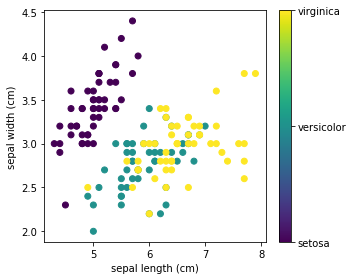

In [16]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np
# Chargement des données
iris = datasets.load_iris()

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()



Le score en train est 0.2
Le score en test est 0.9619047619047619


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


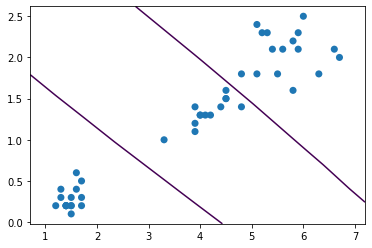

In [17]:
X,y = iris.data, iris.target
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

#-- Apprentissage

clf = MLPClassifier(hidden_layer_sizes=(5,100),solver='sgd', max_iter=1000, random_state=0)
clf.fit(X_train[:,2:4], y_train)


train_score = clf.score(X_train[:,2:4], y_train1)
print("Le score en train est {}".format(train_score))
test_score = clf.score(X_test[:,2:4], y_test)
print("Le score en test est {}".format(test_score))


plt.figure()
# afficher les nuages de points d'apprentissage (pleins) et de test (creux)
plt.scatter(X_train[:,2],X_train[:,3],s=50,edgecolors='none')
plt.scatter(X_test[:,2],X_test[:,3],c='none',s=50,edgecolors='none')
# calculer la probabilité de sortie du MLP pour tous les points du plan
nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z[:, 1].reshape(xx.shape)
# dessiner le contour correspondant Ã  la frontiére proba = 0,5
plt.contour(xx, yy, Z1, [0.5])
plt.show()

- 2. Apprendre cinq modeles de classification des donnees Iris, avec des réseaux qui ont respectivement de 1 a 5 couches cachees, et des tailles de couches entre 10 et 300 au choix. Quelles sont les performances en taux de bonne classification et en temps d’apprentissage obtenus pour chaque modele ?

In [18]:
#ici on définit une function MLPClassifier_fun_mdl  qui prend en entrée des données et puis performe un MLPClassifier 
# argument : hidden_layer_sizes = Nbr_HL, solver = solver_fun , max_iter = iter_num
import time
from sklearn.model_selection import cross_val_score

#-- Apprentissage
def MLPClassifier_fun_mdl (Nbr_HL, solver_fun , iter_num,X_train, y_train,X_test ) :

  mlp = MLPClassifier(hidden_layer_sizes = Nbr_HL, solver = solver_fun , max_iter = iter_num)
  mlp.fit(X_train, y_train)
  predictions = mlp.predict_proba(X_test)
  train_score = mlp.score(X_train, y_train)
  accuracies = cross_val_score(estimator = mlp, X = X_train, y = y_train, cv = 10)
  return accuracies.mean(), accuracies.std()




*   3.comparer les résultats avec une classifieur à noyau de type `SVM` avec noyaux polynomial : **clsvm = svm.SVC(kernel=’poly’).**





In [19]:
#ici on définit une function SVM_fun  qui prend en entrée des données et puis performe un SVM 

from sklearn.svm import SVC

def SVM_Fuc_poly (X_train,y_train, X_test): 
  classifier = SVC(kernel = 'poly', random_state = 0)
#Fit the model for the data
  classifier.fit(X_train, y_train)
#Make the prediction
  y_pred1 = classifier.predict(X_test)
  accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
  print("Accuracy of A SVM model: {:.2f} %".format(accuracies.mean()*100))
  print("Standard Deviation of A SVM model: {:.2f} %".format(accuracies.std()*100))
  return accuracies.mean(), accuracies.std()

In [20]:
from sklearn.preprocessing import StandardScaler
def normalize_data(X ):
  scaler = StandardScaler()
  scaler.fit(X)
 
  X_train = scaler.transform(X)
  return X_train
  


Déterminez, pour chaque attribut d’entrées, sa valeur moyenne et l'écart-type de sa distribution.
Une astuce classique lorsque l’on programme des réseaux de neurones, est de précéder l’apprentissage
du modéle par la normalisation des valeurs d’entrées. Le principe est de ramener toutes les entr«ees
dans un mˆeme intervalle ferm«e, tout en respectant les distributions de probabilit«es de ces entr«ees. Ce
processus de normalisation permet de consid«erer toutes ces valeurs ‘a «egale importance. Attention,
la normalisation doit se faire autant sur les donn«ees d’apprentissage que sur les donn«ees de test
*   Normalisé les données 



In [21]:
from sklearn.preprocessing import StandardScaler


#before normalizing 
SVM_Fuc_poly(X_train,y_train,X_test)
#MLPClassifier_fun_mdl
Nbr_HL, solver_fun , iter_num,X_train, y_train  =  (10,100,25,250,10), 'sgd', 1000, X_train,y_train

Nbr_HL, solver_fun , iter_num,X_train, y_train  =  (10,100,25,250,10), 'sgd', 1000, X_train,y_train
accuracy_mdl1, std_mdl1 = MLPClassifier_fun_mdl(Nbr_HL, solver_fun , iter_num,X_train, y_train, X_test )
print("Accuracy_model_one: {:.2f} %".format(accuracy_mdl1*100))
print("Standard Deviation_model_one: {:.2f} %".format(std_mdl1*100))




Accuracy of A SVM model: 97.50 %
Standard Deviation of A SVM model: 7.50 %


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy_model_one: 98.00 %
Standard Deviation_model_one: 6.00 %


In [22]:
#normalize data 
X_train_normlized = normalize_data(X_train)
X_test_normlized = normalize_data(X_test)


#SVM 
SVM_Fuc_poly(X_train_normlized,y_train,X_test_normlized)

#param initiation
#MLPClassifier_fun_mdl

#model_1 : Nbr_HL = (10,100,25,250,10)
accuracy_mdl1, std_mdl1 = MLPClassifier_fun_mdl(Nbr_HL, solver_fun , iter_num,X_train_normlized, y_train, X_test_normlized )
print("Accuracy_model_one: {:.2f} %".format(accuracy_mdl1*100))
print("Standard Deviation_model_one: {:.2f} %".format(std_mdl1*100))
#model_2 : Nbr_HL = (50,150,25,50,10)
Nbr_HL = (50,150,25,50,10)
accuracy_mdl2, std_mdl2 = MLPClassifier_fun_mdl(Nbr_HL, solver_fun , iter_num,X_train_normlized, y_train, X_test_normlized )
print("Accuracy_model_two: {:.2f} %".format(accuracy_mdl2*100))
print("Standard Deviation_model_two: {:.2f} %".format(std_mdl2*100))
#model_3 : Nbr_HL = (50,150,25,50,10)
Nbr_HL = (10,150,250,100,10)
accuracy_mdl3, std_mdl3 = MLPClassifier_fun_mdl(Nbr_HL, solver_fun , iter_num,X_train_normlized, y_train, X_test_normlized )
print("Accuracy_model_tree: {:.2f} %".format(accuracy_mdl3*100))
print("Standard Deviation_model_tree: {:.2f} %".format(std_mdl3*100))
#model_4 : Nbr_HL = (50,100,250,50,100)
Nbr_HL = (50,100,250,50,100)
accuracy_mdl4, std_mdl4 = MLPClassifier_fun_mdl(Nbr_HL, solver_fun , iter_num,X_train_normlized, y_train, X_test_normlized )
print("Accuracy_model_four: {:.2f} %".format(accuracy_mdl4*100))
print("Standard Deviation_model_four: {:.2f} %".format(std_mdl4*100))
#Model_5 : Nbr_HL = (100,150,200,150,100)
Nbr_HL = (100,150,200,150,100)
accuracy_mdl5, std_mdl5 = MLPClassifier_fun_mdl(Nbr_HL, solver_fun , iter_num,X_train_normlized, y_train , X_test_normlized)
print("Accuracy_model_five: {:.2f} %".format(accuracy_mdl5*100))
print("Standard Deviation_model_five: {:.2f} %".format(std_mdl5*100))

Accuracy of A SVM model: 93.50 %
Standard Deviation of A SVM model: 10.01 %


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

Accuracy_model_one: 97.50 %
Standard Deviation_model_one: 7.50 %


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy_model_two: 98.00 %
Standard Deviation_model_two: 6.00 %


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy_model_tree: 98.00 %
Standard Deviation_model_tree: 6.00 %
Accuracy_model_four: 98.00 %
Standard Deviation_model_four: 6.00 %
Accuracy_model_five: 98.00 %
Standard Deviation_model_five: 6.00 %


In [ ]:
from sklearn.model_selection import GridSearchCV
parameter = {
                        'hidden_layer_sizes': [(50,50,50), (50,100,50)],
                        'activation': ['tanh', 'relu'],
                        'solver': ['sgd', 'adam', 'L-BFGS' ],
                        'alpha': [0.0001, 0.05],
                        'learning_rate_init': [0.5,0.1, 0.01, 0.001],
                        'max_iter': [100,200,250,1000]
                        }
clf=MLPClassifier()
qlf=GridSearchCV (clf, parameter, n_jobs=-1, cv=8)
qlf.fit(X_train, y_train)
print (qlf.best_params_)

## 2 Travail sur le jeu de données MNIST


In [ ]:
#importer les données 
import warnings
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

warnings.simplefilter("ignore")
df = fetch_openml("mnist_784")

In [ ]:
# afficher les données 
df.data.head()

In [ ]:
# afficher les données 
lotImage = df.data.to_numpy()

for i in range(4):
    plt.imshow((lotImage[i].reshape(28,28)))
    plt.show()

## Créer le module

In [ ]:
import time 
from sklearn.metrics import accuracy_score

X_train = df.data[:60000]
X_test = df.data[60000:]
y_train = df.target[:60000]
y_test = df.target[60000:]

In [ ]:
start_time = time.time()
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
prediction = mlp.predict(X_test)
print(accuracy_score(y_test, prediction))
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

start_time = time.time()
mlp = MLPClassifier()
mlp.fit(X_train_scaler, y_train)
prediction = mlp.predict(X_test_scaler)
print(accuracy_score(y_test, prediction))
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
parametres = {'hidden_layer_sizes':[(50,),(50,50),(50,50,50)],
             'activation':["identity","logistic","tanh","relu"],
             'solver':["lbfgs","sgd","adam"],
             'alpha':[0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1],
             'learning_rate':["constant","invscaling","adaptive"]}

mlp_clf = MLPClassifier()
gridS_mlp = GridSearchCV(mlp_clf, parametres, cv=3, n_jobs=4)
gridS_mlp.fit(X_train_scaler, y_train)


print(gridS_mlp.best_params_)

In [ ]:
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes = (50, 50), activation="relu", solver="adam",alpha =0.1 ,learning_rate = "adaptive")
mlp.fit(X_train_scaler, y_train)
prediction = mlp.predict(X_test_scaler)
print(accuracy_score(y_test, prediction))
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
MaximumScore = 0

for i in range(0,10):

    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes = (100, 100), activation="relu", solver="adam",alpha =0.1 ,learning_rate = "adaptive")
    mlp.fit(X_train_scaler, y_train)
    prediction = mlp.predict(X_test_scaler)
    
    if MaximumScore < accuracy_score(y_test, prediction):
        MaximumScore = accuracy_score(y_test, prediction)
        tempsExec = time.time() - start_time
        print(accuracy_score(y_test, prediction))
        print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
mlp=MLPClassifier(solver='adam',random_state=1, max_iter=100, hidden_layer_sizes=(500,),alpha=1e-6)
mlp.fit(X_train_scaler, y_train)
prediction = mlp.predict(X_test_scaler)
print(accuracy_score(y_test, prediction))
print("--- %s seconds ---" % (time.time() - start_time))